# Image Operators And Transforms

Nina Miolane, UC Santa Barbara

<center><img src="figs/02_main.png" width=1200px alt="default"/></center>


# Last Lecture

- **01: Image Formation Models (Ch. 2)**
- 02: Image Operators and Transforms (Ch. 3)
- 03: Feature Detection, Matching, Segmentation (Ch. 7)
- 04: Image Alignment and Stitching (Ch. 8)
- 05: 3D Reconstruction (Ch. 13)

We have seen how images are formed based on:
- 3D scene elements, 
- camera intrinsic parameters,
- camera extrinsic parameters.

# This Lecture

- 01: Image Formation Models (Ch. 2)
- **02: Image Operators and Transforms (Ch. 3)**
- 03: Feature Detection, Matching, Segmentation (Ch. 7)
- 04: Image Alignment and Stitching (Ch. 8)
- 05: 3D Reconstruction (Ch. 13)

We will look at our first image processing operators and transforms, which:
- convert an image into another image,
- make the image more suited to answer a question in the downstream analysis.

# Continuous and Discrete Images

$\color{#EF5645}{\text{Continuous Images}}$: A continuous image is represented as a function over a 2D continuous domain $\Omega^2$, i.e. $f: \Omega^2 \rightarrow \mathbb{R}^c$, where $c$ is the number of ``channels" of the images, typically the three colors R, G, B. The elements $x$ of the continuous domain are represented by their 2D coordinates.

$\color{#EF5645}{\text{Discrete Images}}$: A discrete (sampled) image is represented as a function over a 2D discrete domain $[1, ..., n] \times [1, ..., m] $, i.e. $f: [1, ..., n] \times [1, ..., m] \rightarrow \mathbb{R}^c$, where $c$ is the number of channels. The elements $x$ of the discrete domain are denoted by the indices of the pixel that they represent $x=(i, j)$.

<class 'numpy.ndarray'>
(512, 512, 3)


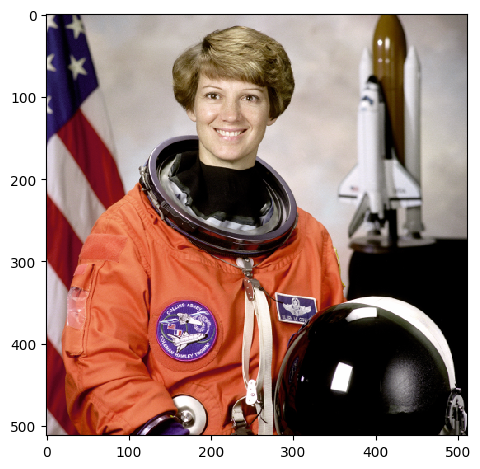

In [7]:
from skimage import data, io

image = data.astronaut()
print(type(image))
print(image.shape)

io.imshow(image);

# io.imshow(image[10:300, 50:200, 2]);

# Operators

$\color{#EF5645}{\text{Operator}}$: An operator is a function $H$ that takes one image $f$ as input and produces an output image $g$.

$\color{#EF5645}{\text{Linear Operator}}$: The operator $H$ is said to be linear if we have:

$$H(af+bg) = aH(f) +bH(g)$$

for all images $f$ and $g$, and for all constants $a$ and $b$.

# Introduction to Image Operators and Transforms

- **Point Operators**

- Neighborhood Operators

- Fourier Transform

- Pyramids

- Wavelets

# Point Operators

$\color{#EF5645}{\text{Point Operator}}$: A _point operator_ is an operator $H$ that takes one image $f$ as input and outputs an image $g=H(f)$, with the same domain, such that:
- For continuous images and $x \in \Omega^2$ a 2D continuous domain:
$$g(x) = h(f(x))$$
- For discrete images and $x=(i, j) \in [1, n]^2$ a 2D discrete domain:
$$g(i, j) = h(f(i ,j))$$

In other words, each output pixel’s value depends on only the corresponding input pixel value. 

The operator $H$ is entirely defined by the function $h$ that only acts on output values from $f$.

# Examples

$\color{#047C91}{\text{Example}}$: The multiplicative gain operator is an example of a point operator:
$$g(x) = af(x) + b,$$
where $a >0$ and $b$ are called the gain and bias parameters.

$\color{#047C91}{\text{Example}}$: Spatially varying multiplicative gain operator is an example of a point operator:
$$g(x) = a(x)f(x) + b(x),$$
where the bias and gain parameters can also be spatially varying.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


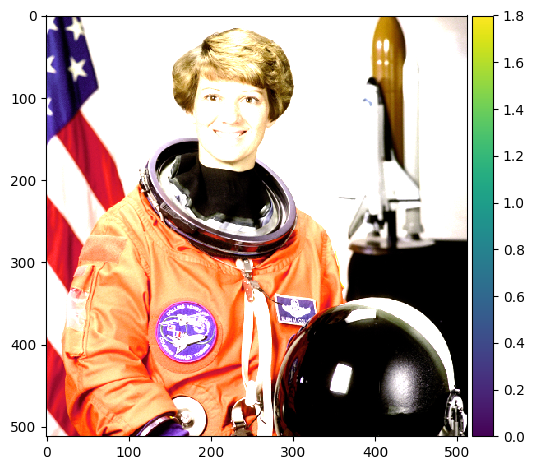

In [12]:
from skimage import data, io

image = data.astronaut()
image = image / 255

gain = 1.8  # a
bias = 0.  # b

mult_image = gain * image + bias
io.imshow(mult_image);

$\color{#047C91}{\text{Example}}$: The linear blend operator is an example of point operator:
$$g(x) = (1- \alpha)f_0(x) + \alpha f_1(x)$$
Varying $\alpha$ from $0$ to $1$, this operator can be used to perform atemporal cross-dissolve between two images or videos, as seen in slide shows and film production.

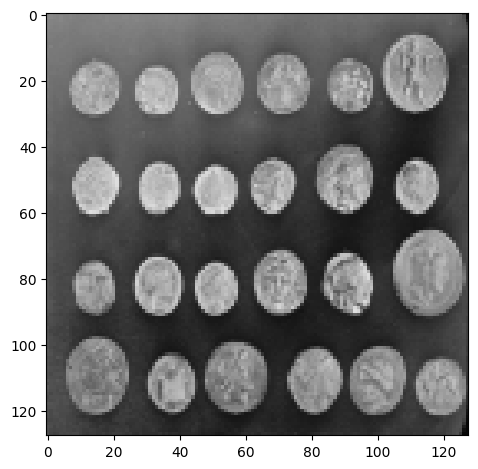

In [16]:
from skimage import data, io
from skimage.transform import resize

image0 = data.coins() / 255
image1 = data.brick() / 255
image0 = resize(image0, (128, 128))
image1 = resize(image1, (128, 128))

alpha = 0.

blend_image = (1 - alpha) * image0 + alpha * image1
io.imshow(blend_image);

# Introduction to Image Operators and Transforms

- Point Operators

- **Neighborhood Operators**

- Fourier Transform

- Pyramids

- Wavelets

# Neighborhood Operators

$\color{#EF5645}{\text{Neighborhood operators}}$ use a collection of pixels in the vicinity of a given location in input image $f$ to determine the intensity at this location in the output image $g$. Neighborhood operators are used to filter images to:
- add blur or sharpen details, 
- accentuate edges,
- remove noise.


<center><img src="figs/02_point_neighborhood.jpg" width=300px alt="default"/></center>

# Linear Filters

We first consider linear neighbordhood operators, also called linear filters.

$\color{#EF5645}{\text{A linear filter}}$: generates an output pixel's value that is calculated using a weighted sum of input pixel values within small neighborhood.

<center><img src="figs/02_point_neighborhood.jpg" width=300px alt="default"/></center>

# Convolution

$\color{#EF5645}{\text{The convolution operator}}$ with filter or kernel $g$, denoted $f * g$ is defined as:

- Continuous images: 

$$(f * g) (x) = \int_u f(u) g(x-u)du.$$

- Discrete images: 

$$(f * g) (i, j) = \sum_{k = -\infty}^{\infty}\sum_{l=-\infty}^\infty f(k, l)g(i-k, j-l).$$

$g$ is also called the filter or kernel. Changing $g$ produces different filtering, i.e. different operators.

<center><img src="figs/02_cross_conv.png" width=800px alt="default"/></center>

<center><img src="figs/02_conv2.jpg" width=1000px alt="default"/></center>


In [26]:
107*0.1+91*0.1+63*0.1 + 115*0.1+96*0.2+65*0.1 + 123*0.1+98*0.1+65*0.1

91.90

# Cross-correlation

$\color{#EF5645}{\text{The cross-correlation operator}}$ with kernel $g$, denoted $f \otimes g$, is defined as:


- For continuous images: 

$$(f \otimes g) (x) = \int_u f(u) g(x+u)du.$$

- For discrete images: 

$$(f \otimes g) (i, j) = \sum_{k = -\infty}^{\infty}\sum_{l=-\infty}^\infty f(k, l) g(i + u, j + v).$$

Changing the filter $h$ produces different filtering, i.e. different operators. Note the + sign that differentiates this operation from convolution.

<center><img src="figs/02_conv2.jpg" width=800px alt="default"/></center>

In [27]:
65*0.1+98*0.1+123*0.1 + 65*0.1+96*0.2+115*0.1 +63*0.1+91*0.1+107*0.1

91.90

<center><img src="figs/02_cross_conv.png" width=800px alt="default"/></center>

# Examples: Smoothing Kernels

Filtering can be used to blur an image.


$\color{#EF5645}{\text{The Moving Average}}$ averages the pixel values in a $K × K$ window, i.e. convolves/cross-correlates the image with a:
- normalized constant kernel.



<center><img src="figs/02_moving_average.jpg" width=400px alt="default"/></center>

[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 1. 0. 0.]
 [0. 0. 1. 1. 1. 0. 0.]
 [0. 0. 1. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]
[[0.11 0.11 0.11]
 [0.11 0.11 0.11]
 [0.11 0.11 0.11]]


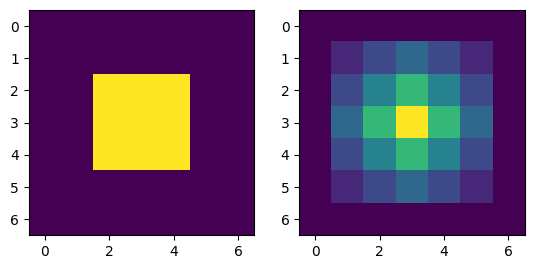

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage as ndi
%precision 2

bright_square = np.zeros((7, 7)); bright_square[2:5, 2:5] = 1
mean_kernel = np.full((3, 3), 1/9)
print(bright_square); print(mean_kernel)

fig, axes = plt.subplots(nrows=1, ncols=2)
axes[0].imshow(bright_square); axes[1].imshow(ndi.correlate(bright_square, mean_kernel));

# Examples: Smoothing Kernels

$\color{#EF5645}{\text{Gaussian Filter}}$ convolves/cross-correlates the image with a the
- Gaussian kernel,
which is obtained by convolving the linear tent function with itself.

<center><img src="figs/02_gaussian.jpg" width=350px alt="default"/></center>

# Introduction to Image Operators and Transforms

- Point Operators

- Neighborhood Operators

- Fourier Transform

- Pyramids

- Wavelets

Now: your presentations!